In [256]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

In [297]:
# Read dataset
cwd = os.getcwd()
file_path = os.path.dirname(cwd) + '\\Datasets\\' +  'Topic_Survey_Assignment.csv'
os.chdir(os.path.dirname(cwd) + '\\Datasets\\')

In [298]:
data = pd.read_csv(file_path, index_col=0)

# Percentage of the Respondents interest in Data Science Areas

In [299]:
# Prepare dataset
data.sort_values(by= 'Very interested', ascending= False, inplace= True)
data = (data / 2233)
data

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,0.755934,0.198836,0.026870
Machine Learning,0.729512,0.213614,0.033139
Data Visualization,0.600090,0.328706,0.045678
Big Data (Spark / Hadoop),0.596507,0.326467,0.056874
Deep Learning,0.565607,0.344828,0.060905
Data Journalism,0.192118,0.484102,0.273175


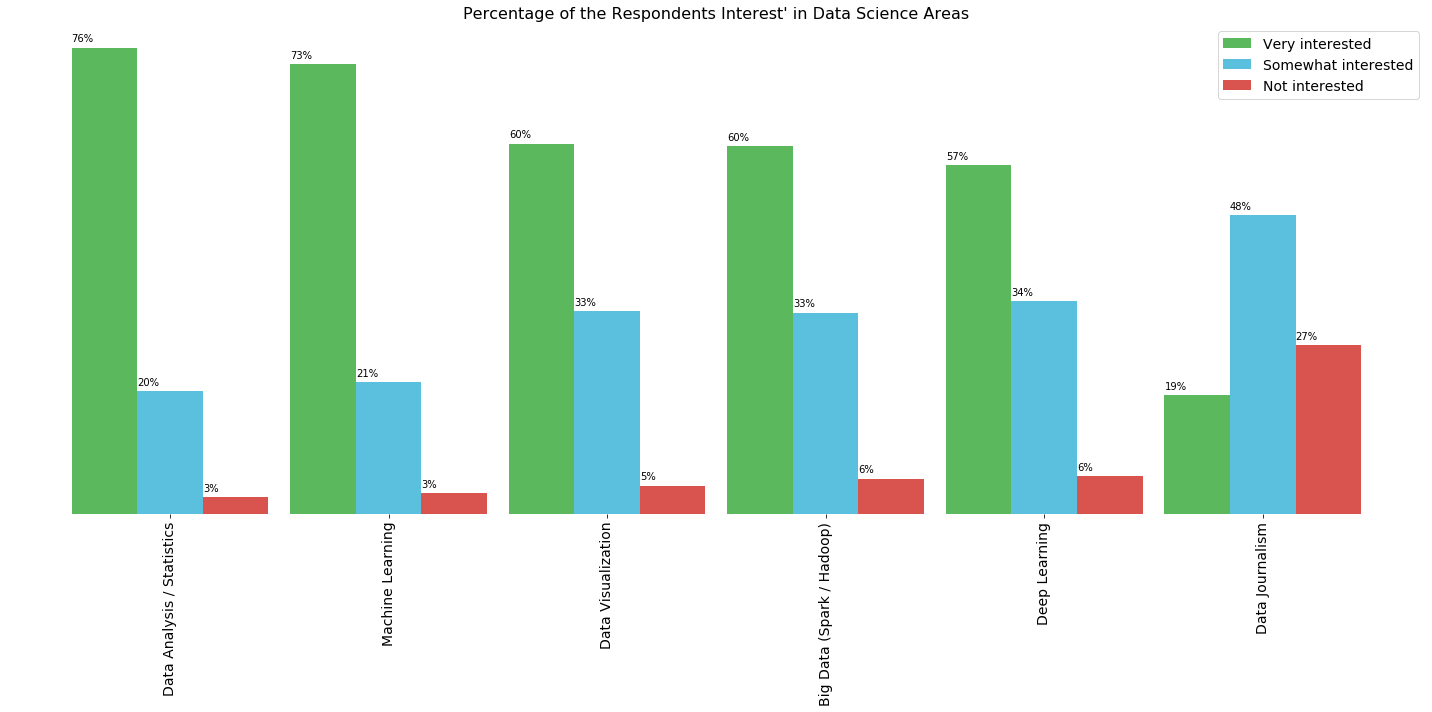

In [302]:
# Create visualization pyplot
width = 0.3

x = np.arange(6)
fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width, np.array(data.iloc[:, 0]), width, color='#5cb85c', label='Very interested')   
rects2 = ax.bar(x, np.array(data.iloc[:, 1]), width, color='#5bc0de', label='Somewhat interested')
rects3 = ax.bar(x + width, np.array(data.iloc[:, 2]), width, color='#d9534f', label='Not interested')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title("Percentage of the Respondents Interest' in Data Science Areas", fontsize= 16)
ax.set_xticks(x)
ax.set_xticklabels(data.index, rotation=90, fontsize=14)
ax.legend(loc= 'upper right', fontsize= 14)
                
#def autolabel(rects):
 #   """
 #   Attach a text label above each bar displaying its height
 #   """
 #   for rect in rects:
 #       height = rect.get_height()
 #       ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
#                '%d' % int(height),
#                ha='center', va='bottom', fontsize=14)
 
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])    
    
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

ax.yaxis.set_visible(False)
                   
#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)

fig.tight_layout()

plt.tick_params(labelbottom='on')

plt.show()                
                

In [278]:
 np.array(data.iloc[:, 0])

array([3.39, 3.27, 2.69, 2.67, 2.53, 0.86])

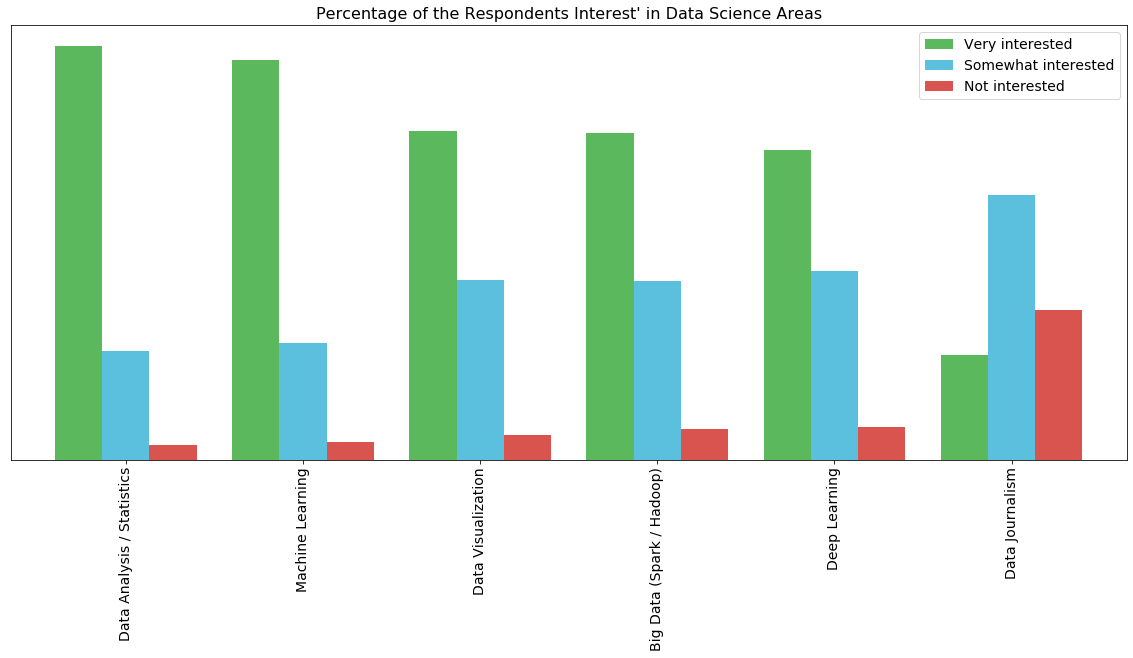

In [96]:
# Create visualization pandas plot
ax = data.plot(
    kind= 'bar',
    width= 0.8,
    stacked= False,
    figsize= (20,8),
    color= ('#5cb85c' , '#5bc0de', '#d9534f'),
    fontsize= 14
    )

ax.yaxis.set_visible(False)

plt.tick_params(labelbottom='on')
plt.title("Percentage of the Respondents Interest' in Data Science Areas", fontsize= 16)
plt.legend(loc= 'upper right', fontsize= 14)

plt.show()

# Choropleth  maps

In [236]:
# Read dataset
cwd = os.getcwd()
file_path = os.path.dirname(cwd) + '\\Datasets\\' +  'Police_Department_Incidents_-_Previous_Year__2016_.csv'

In [237]:
data = pd.read_csv(file_path)

In [238]:
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [239]:
sf_crime = pd.DataFrame(data.loc[:, 'PdDistrict'].value_counts())
sf_crime.reset_index(inplace=True)
sf_crime.columns = ['Neighborhood', 'Count']
sf_crime

,Neighborhood,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


In [251]:
import wget
url = 'https://cocl.us/sanfran_geojson'
file_path ='san_fran.json'

world_geo = wget.download(url, file_path)
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [269]:
import folium

sf_map = folium.Map(location=[37.77, -122.42], zoom_start=12)
sf_map

In [266]:
sf_geo = r'san_fran.json'

'C:\\Users\\ppatrzalek\\Documents\\GitHub\\Introduction-to-Python\\Datasets'

In [270]:
sf_map.choropleth(
    geo_data=sf_geo,
    data = sf_crime,
    columns=['Neighborhood', 'Count'],
    key_on='features.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    fill_line=0.2,
    legend_name='Crime Rate in San Francisco'
)

folium.LayerControl().add_to(sf_map)

sf_map

FileNotFoundError: [Errno 2] No such file or directory: '\\\\san_fran.json'